# Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns= boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
X = df[['LSTAT']].values
y = boston_data.target

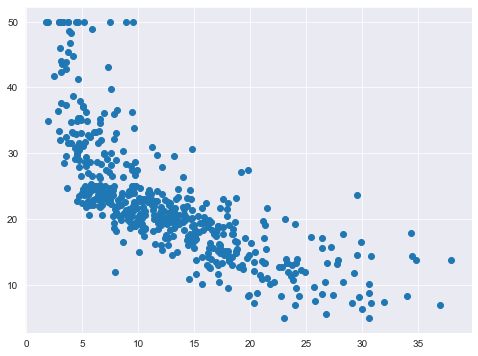

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(X,y);

# Without pre-processing

In [5]:
alpha = .001
w_=np.zeros(1 + X.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X,w_[1:])+w_[0]
    errors = (y-y_pred)
    
    w_[1:] += alpha*X.T.dot(errors)  # this w_[1:]and w_[0] is for theta1 and theta0 
    # piecewise multiplication and addition.
    # If equation is y=theta0+theta1*x 
    w_[0] +=alpha*errors.sum()
    
    cost = (errors**2).sum() / 2.0  #this is j(theta)
    cost_.append(cost)

C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\numpy\core\_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\dell\Anaconda3\envs\iris2\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  


Text(0.5, 0, 'Epoch')

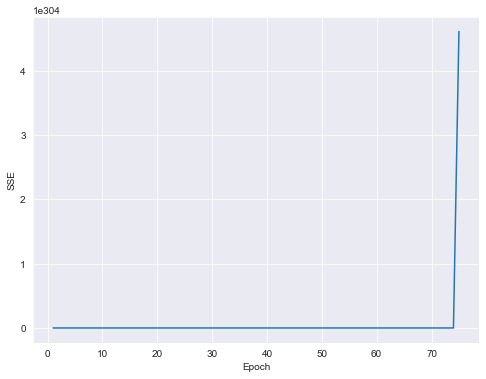

In [6]:
plt.figure(figsize=(8,6))
plt.plot(range(1, n_ + 1),cost_);
plt.ylabel('SSE')
plt.xlabel("Epoch")

# With Pre-Processing

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten() 

In [12]:
alpha = .0001
w_= np.zeros(1+X_std.shape[1])
cost_ = []
n_=100

for i in range(n_):
    y_pred  = np.dot(X_std,w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0]  += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

In [13]:
print(w_)

[-7.57793828e-16 -7.33562757e-01]


Text(0.5, 0, 'Epoch')

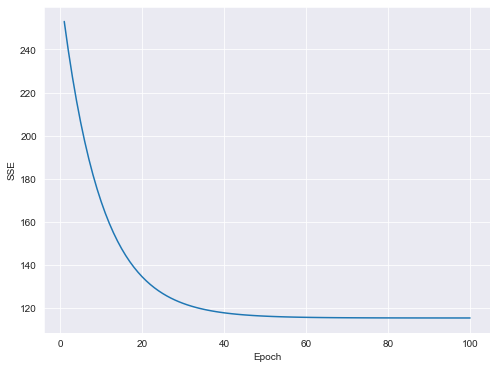

In [14]:
plt.figure(figsize=(8,6))
plt.plot(range(1, n_ + 1),cost_);
plt.ylabel('SSE')
plt.xlabel("Epoch")

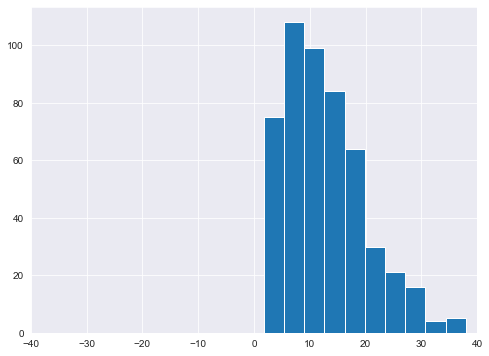

In [11]:
plt.figure(figsize=(8,6))
plt.hist(X);
plt.xlim(-40,40);

(-4, 4)

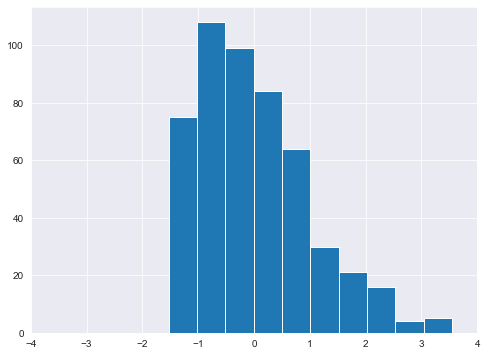

In [12]:
plt.figure(figsize=(8,6))
plt.hist(X_std);
plt.xlim(-4,4)

# Data Pre-Processing

In [16]:
from sklearn import preprocessing

In [17]:
X_train = np.array([[1.,-1.,2.],
                   [2.,0.,0.],
                   [0.,1.,-1.]])

In [18]:
X_train.mean(axis=0)  #here is mean is like this[1stcolumn.mean  2ndcolumn.mean  3rdcolumn.mean]
#axis=0 mean column wise
#axis=1 mean row wise

array([1.        , 0.        , 0.33333333])

# Standardization / Mean Removal / Variance Scaling
[scikitScale]

In [16]:
X_scale = preprocessing.scale(X_train)

In [17]:
X_scale

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

scaled data has zero mean and unit variance

In [18]:
X_scale.mean(axis=0)

array([0., 0., 0.])

In [19]:
X_scale.std(axis=0)

array([1., 1., 1.])

Keeping in mind that u have scaled ur training data,u must do likewise with ur test data as well.However,ur assumption is that the mean and variance must be invariant b/w ur train and test data.scikit-learn assists with a built-in utility function StandardScaler

In [20]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler #now here we gen new model(name scaler whoes mean and scale is fixed)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [22]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [23]:
scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [24]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

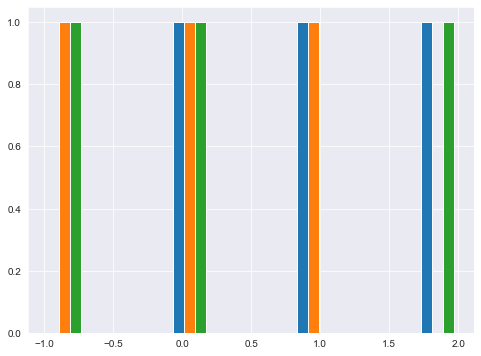

In [25]:
plt.figure(figsize=(8,6)) 
plt.hist(X_train);

you can now utilise the transform for new dataset

In [26]:
x_test = [[-1., 1., 0.]]

In [27]:
scaler.transform(x_test)

array([[-2.44948974,  1.22474487, -0.26726124]])

#  Min-Max or  Scaling Features to a Range

#### MinMaxScaler
Scale a data to the [0,1] rnage


In [28]:
X_train = np.array([[1., -1., 2.],
                   [2., 0., 0.],
                   [0., 1., -1]])

In [29]:
min_max_scaler = preprocessing.MinMaxScaler()  #this is the model

In [30]:
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax


array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

Now to unseen data

In [31]:
X_test = np.array([[-3., -1., 0.],[2., 1.5,4.]])

In [32]:
X_test_minmax  = min_max_scaler.transform(X_test)
X_test_minmax   # here we see that in traing data 2 is max
                #but in test data have max 4 which is 
                #out of range so here ans is not in range[0,1]

array([[-1.5       ,  0.        ,  0.33333333],
       [ 1.        ,  1.25      ,  1.66666667]])

doc:


preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such
that it is in the given range on the training set, e.g. between
zero and one.

The transformation is given by::

    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min

where min, max = feature_range.



In [33]:
preprocessing.MinMaxScaler?

# MaxAbsScaler

In [34]:
X_train = np.array([[1., -1., 2.],
                   [2., 0., 0.],
                   [0., 1., -1]])

In [35]:
max_abs_Scaler =   preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_Scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [36]:
X_test = np.array([[ -1., -0.5, 2],[0., 0.5, -0.6]])
X_test_maxabs = max_abs_Scaler.transform(X_test)
X_test_maxabs

array([[-0.5, -0.5,  1. ],
       [ 0. ,  0.5, -0.3]])

# Scaling Sparse data

# Scaling vs Whitening

# Normalization

In [37]:
preprocessing.normalize?

In [38]:
X = [[1., -1., 20.],[2., 0., 0.],[0., 1., -1.]]
X_normal = preprocessing.normalize(X,norm = 'l1')
X_normal

array([[ 0.04545455, -0.04545455,  0.90909091],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.5       , -0.5       ]])

Alternatively                                                                                     
The preprocessing module further provides a utility class Normalizer that implements the same operation using the Transformer API

In [39]:
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing

In [40]:
normalizer.transform(X)

array([[ 0.04987547, -0.04987547,  0.99750934],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [41]:
normalizer.transform([[-1., 1., 0.]])

array([[-0.70710678,  0.70710678,  0.        ]])

# Binarization
                f(x) = 0 or 1

In [42]:
X = [[1., -1., 2.],
     [2., 0., 0.],
     [0., 1., -1.]]

binarizer = preprocessing.Binarizer().fit(X)   # fit does nothing
binarizer

Binarizer(copy=True, threshold=0.0)

In [43]:
binary = binarizer.transform(X)
binary

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

Modified Threshold

In [44]:
binarizer = preprocessing.Binarizer(threshold = -1.5) #threshold value is like a reference value .if any value greater than it become 1 else become 0

In [45]:
binarizer.transform(X)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

# Encoding catogorical features

[LabelEncoder]

In [46]:
source = ['australia','singapore','newzealand','hongkong']

In [47]:
label_enc = preprocessing.LabelEncoder()
src = label_enc.fit_transform(source)

In [48]:
print("country to code mapping:\n")    
for k, v in enumerate(label_enc.classes_):#enumerate is useful for obtaining 
                 print(v,'\t',k)       #an indexed list:(0, seq[0]), (1, seq[1]), (2, seq[2]), ...

country to code mapping:

australia 	 0
hongkong 	 1
newzealand 	 2
singapore 	 3


In [49]:
test_data = ['hongkong','singapore','australia','newzealand']

In [50]:
result = label_enc.transform(test_data)
print(result)

[1 3 0 2]


# One Hot/One-of-K Encoding
.Useful for dealing with sparse matrix
.uses one-of-k-scheme

the process of turning  a series of categorical response into a set of binary result(0 or 1)


\One Hot Encoder

In [51]:
source

['australia', 'singapore', 'newzealand', 'hongkong']

In [52]:
src

array([0, 3, 2, 1], dtype=int64)

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
one_hot_enc = OneHotEncoder(sparse =False)
src = src.reshape(len(src), 1)
one_hot = one_hot_enc.fit_transform(src)
print(one_hot)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [55]:
src

array([[0],
       [3],
       [2],
       [1]], dtype=int64)

In [56]:
invert_res = label_enc.inverse_transform([np.argmax(one_hot[0,:])])
print(invert_res)

['australia']


In [57]:
invert_res = label_enc.inverse_transform([np.argmax(one_hot[3,:])])  #this is third row[2,:]
print(invert_res)

['hongkong']


In [58]:
invert_res = label_enc.inverse_transform([np.argmax(one_hot[3,:])]) #argmax give index
print(invert_res)

['hongkong']


In [59]:
np.argmax?

In [60]:
a=np.array([[10, 101, 12],
       [13, 14, 15]])

In [61]:
np.argmax(a)

1

In [62]:
print(np.argmax(one_hot[2,:])) # this is third row[2,:]

2


In [63]:
OneHotEncoder?

# References

.section-should i normalize/standardize/rescale the data
.Colleen Farrelly-Machine learning by Analogy
.Lior Rokach-Introduction to Machine Learning
.Ritchie Ng